In [37]:
import os
import keras 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [38]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [39]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
        elif ".jpeg" in file:
            paths.append(os.path.join(r, file))
        elif ".JPG" in file:
            paths.append(os.path.join(r, file))
        

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        flipped_img = np.flip(img, 1)
        data.append(flipped_img)
        result.append(encoder.transform([[0]]).toarray())

In [40]:

paths = []
skipped_paths=[]
for r, d, f in os.walk(r"/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
        elif ".jpeg" in file:
            paths.append(os.path.join(r, file))
        elif ".JPG" in file:
            paths.append(os.path.join(r, file))


for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        flipped_img = np.flip(img, 1)
        data.append(flipped_img)
        result.append(encoder.transform([[1]]).toarray())
    else:
        skipped_paths.append(path)

print("Skipped image paths:")
for path in skipped_paths:
    print(path)

Skipped image paths:
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/no 10.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/no.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/N15.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/no 99.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/no 98.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/No13.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/No17.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/1 no.jpeg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/No15.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/no/N21.jpg
/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/n

In [41]:
data = np.array(data)
data.shape

(432, 128, 128, 3)

In [42]:
result = np.array(result)
result = result.reshape(432,2)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [44]:
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(128, 128, 3),strides=(2,2), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',strides=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',strides=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())


/Users/kartiksethi/Desktop/Mritumor/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 63, 63, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,522 (3.25 MB)

 Trainable params: 851,522 (3.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [45]:
y_train.shape

(345, 2)

In [46]:
history = model.fit(x_train, y_train, epochs=40, batch_size=40, verbose=1, validation_split=0.1)


Epoch 1/40


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.6101 - loss: 16.3708 - val_accuracy: 0.6571 - val_loss: 3.0619
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - accuracy: 0.6909 - loss: 1.7115 - val_accuracy: 0.6857 - val_loss: 0.7501
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.7224 - loss: 0.6810 - val_accuracy: 0.7143 - val_loss: 0.5584
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.7523 - loss: 0.5130 - val_accuracy: 0.7714 - val_loss: 0.5453
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.8252 - loss: 0.3876 - val_accuracy: 0.8000 - val_loss: 0.5418
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.8175 - loss: 0.3829 - val_accuracy: 0.8286 - val_loss: 0.4725
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - accuracy: 0.8670 - loss: 0.2944 - val_accuracy: 0.8857 - val_loss: 0.4267
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step - accuracy: 0.9393 - loss: 0.2132 - val_accuracy: 0.9143 - val_loss: 0.3832
Ep

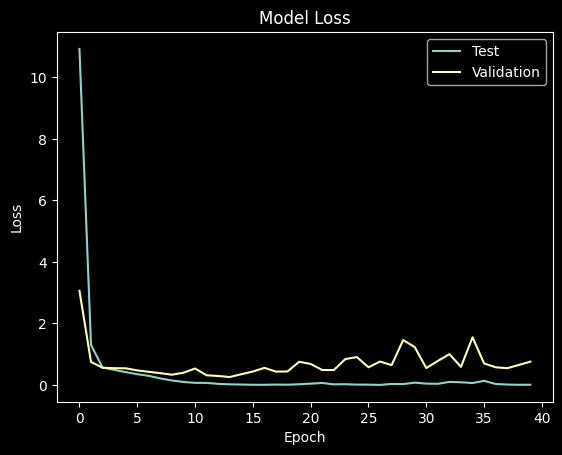

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

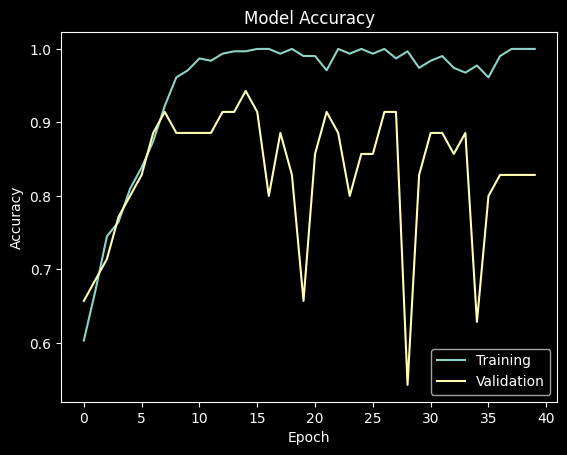

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


In [49]:
# Evaluate the model
test_loss = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8724 - loss: 0.8108
Test Loss: [0.9291951060295105, 0.8620689511299133]


In [50]:
from sklearn.metrics import accuracy_score

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute test accuracy
test_accuracy = accuracy_score(y_true, y_pred)

print("Test Accuracy:", test_accuracy*100)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Test Accuracy: 86.20689655172413


In [51]:
from sklearn.metrics import f1_score

# Compute F1-score
f1 = f1_score(y_true, y_pred)

print("F1 Score:", f1)


F1 Score: 0.8064516129032258


In [52]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

In [53]:
# def names(number):
#     if number==0:
#         return 'Its a Tumor'
#     else:
#         return 'No, Its not a tumor'

In [54]:
# import numpy as np
# import cv2
# from matplotlib import pyplot as plt
# from IPython.display import display
# import time
# from PIL import Image

# # Define the function to get the class name
# def names(classification):
#     if classification == 0:
#         return "Tumor"
#     elif classification == 1:
#         return "Normal"
#     else:
#         return "Unknown"

# # Read the model
# # Assuming you have already loaded and compiled your Keras model and named it 'model'

# # Define the paths to the images
# image_paths = [
#     '/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/blur/Brain.jpg'
# ]

# # Loop through each image path
# for image_path in image_paths:
#     # Reading the image
#     img = cv2.imread(image_path)

#     # Denoising the image using median filter
#     dst = cv2.medianBlur(img, 5)  # Adjust kernel size as needed

#     start_time = time.time()

#     # Plotting the original and denoised image
#     plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.title('Original Image')
#     plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
#     plt.title('Denoised Image')

#     end_time = time.time()

#     plt.show()
#     execution_time = end_time - start_time
#     print("Execution time for denoising:", execution_time, "seconds")

#     # Reading the image for classification
#     img = Image.open(image_path)
#     x = np.array(img.resize((128,128)))
#     x = x.reshape(1,128,128,3)
    
#     start_time = time.time()

#     # Predicting the class
#     res = model.predict_on_batch(x)
#     classification = np.argmax(res)

#     end_time = time.time()

#     # Displaying the image and prediction
#     plt.imshow(dst)
#     plt.show()

#     execution_time = end_time - start_time
#     print("Execution time for classification:", execution_time, "seconds")
#     print("Confidence This Is " + names(classification) + ": " + str(res[0][classification]*100) + "%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


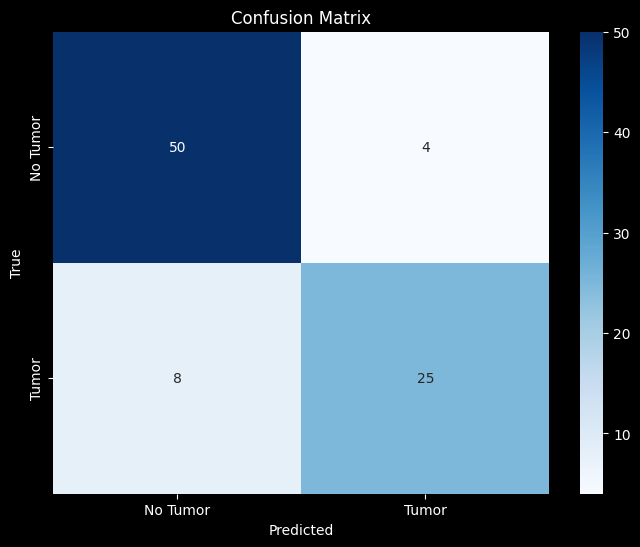

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Tumor', 'Tumor'], 
            yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


98.40033650398254% Confidence This Is A Its a Tumor


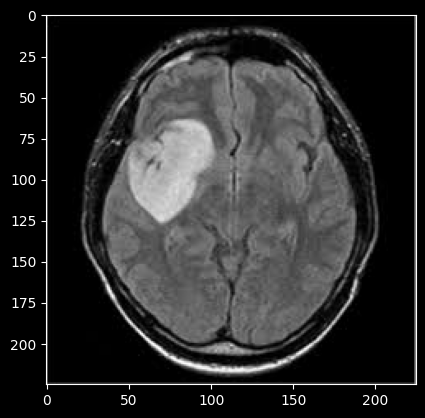

In [56]:
from matplotlib.pyplot import imshow
img = Image.open(r"/Users/kartiksethi/Desktop/Mritumor/Simple Classification/brain_tumor_dataset/yes/Y4.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))
model.save('loc.keras') 

In [57]:
print("Example Predictions:")
for i in range(10):
    actual_class = "Tumor" if y_true[i] == 1 else "No Tumor"
    predicted_class = "Tumor" if y_pred[i] == 1 else "No Tumor"
    print(f"Example {i+1}: Actual - {actual_class}, Predicted - {predicted_class}, Probabilities: {y_pred_probs[i]}")


Example Predictions:
Example 1: Actual - No Tumor, Predicted - No Tumor, Probabilities: [0.95797133 0.04202863]
Example 2: Actual - Tumor, Predicted - Tumor, Probabilities: [1.2573904e-07 9.9999988e-01]
Example 3: Actual - No Tumor, Predicted - No Tumor, Probabilities: [0.98400337 0.01599666]
Example 4: Actual - No Tumor, Predicted - No Tumor, Probabilities: [9.9991435e-01 8.5712221e-05]
Example 5: Actual - No Tumor, Predicted - No Tumor, Probabilities: [9.9998987e-01 1.0157136e-05]
Example 6: Actual - No Tumor, Predicted - No Tumor, Probabilities: [9.99878407e-01 1.21620265e-04]
Example 7: Actual - Tumor, Predicted - Tumor, Probabilities: [4.1884877e-04 9.9958110e-01]
Example 8: Actual - No Tumor, Predicted - No Tumor, Probabilities: [1.0000000e+00 1.6158128e-10]
Example 9: Actual - No Tumor, Predicted - No Tumor, Probabilities: [9.9997061e-01 2.9401153e-05]
Example 10: Actual - No Tumor, Predicted - No Tumor, Probabilities: [9.999958e-01 4.168497e-06]
